##### Nonconvex quadratic programming
* Method: trusy region
* box: [0, 1] (projection/interior point method)

Converged in 24 iterations


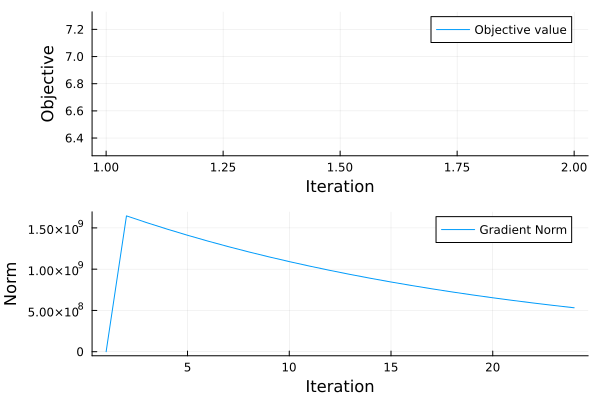

In [21]:
using LinearAlgebra
using Plots

# Generate a 10x10 non-positive definite matrix Q
Q = rand(10, 10)
Q = Q * Q' - 5I

# Generate a 10-dimensional vector q
q = rand(10)

# Objective function
objective(x) = 0.5 * x' * Q * x + q' * x

# Gradient of the objective function
gradient(x) = Q * x + q

# Interior Point Method with Trust Region
function interior_point_method(Q, q, x0; τ=0.1, max_iters=1000, tolerance=1e-5, delta=1.0)
    x = x0
    objective_values = []
    grad_norms = []

    for i in 1:max_iters
        # Barrier term and its gradient
        barrier = -τ * sum(log.(x) .+ log.(1 .- x))
        grad_barrier = -τ * (1 ./ x - 1 ./ (1 .- x))
        
        # Total gradient
        grad = gradient(x) + grad_barrier
        push!(grad_norms, norm(grad))

        # Trust Region: Determine step size based on the trust region radius (delta)
        p = -delta * grad / norm(grad)
        x_new = x + p

        # Ensure feasibility
        x_new = max.(min.(x_new, 1 - 1e-10), 1e-10)
        
        # Calculate the ratio of actual reduction to predicted reduction
        actual_reduction = objective(x) - objective(x_new)
        predicted_reduction = -dot(grad, p)

        # Update the trust region radius
        if actual_reduction / predicted_reduction < 0.25
            delta = 0.25 * delta
        elseif actual_reduction / predicted_reduction > 0.75 && norm(p) == delta
            delta = min(2.0 * delta, 1.0)
        end

        # Update the solution if the actual reduction is positive
        if actual_reduction > 0
            x = x_new
            push!(objective_values, objective(x))
        end

        # Check convergence
        if norm(grad) * delta < tolerance
            println("Converged in $i iterations")
            break
        end

        # Decrease the barrier term influence
        τ *= 0.95
    end
    return x, objective_values, grad_norms
end

# Initial guess
x0 = rand(10)

# Run the optimization
x_star, objective_values, grad_norms = interior_point_method(Q, q, x0)

# Plotting the convergence and gradient norms
p1 = plot(objective_values, label="Objective value", xlabel="Iteration", ylabel="Objective")
p2 = plot(grad_norms, label="Gradient Norm", xlabel="Iteration", ylabel="Norm")
plot(p1, p2, layout=(2,1))


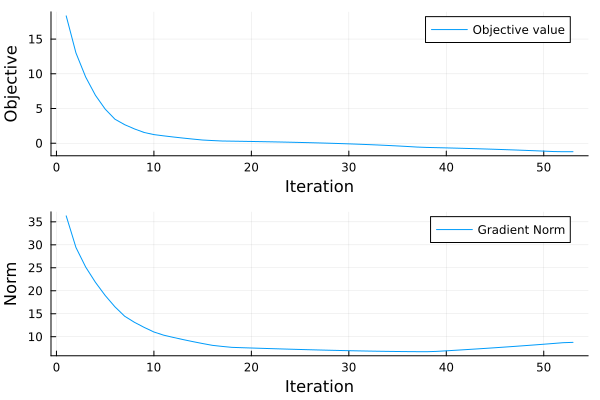

Converged in 53 iterations


In [24]:
using LinearAlgebra
using Plots

# Generate a 10x10 non-positive definite matrix Q
Q = rand(10, 10)
Q = Q * Q' - 5I

# Generate a 10-dimensional vector q
q = rand(10)

# Objective function
objective(x) = 0.5 * x' * Q * x + q' * x

# Gradient function
gradient(x) = Q * x + q

# Projection function
projection(x) = max.(min.(x, 1), 0)

# Gradient descent with projection
function projected_gradient_descent(Q, q, x0; α=0.01, max_iters=1000, tolerance=1e-5)
    x = x0
    objective_values = []
    grad_norms = []

    for i in 1:max_iters
        grad = gradient(x)
        push!(grad_norms, norm(grad))  # Correct usage of push!
        x_new = x - α * grad
        x_new = projection(x_new)
        push!(objective_values, objective(x_new))  # Correct usage of push!
        
        # Check convergence
        if norm(x - x_new) < tolerance
            println("Converged in $i iterations")
            break
        end
        x = x_new
    end
    return x, objective_values, grad_norms
end

# Initial guess
x0 = rand(10)

# Run the optimization
x_star, objective_values, grad_norms = projected_gradient_descent(Q, q, x0)

# Plotting the convergence and gradient norms
p1 = plot(objective_values, label="Objective value", xlabel="Iteration", ylabel="Objective")
p2 = plot(grad_norms, label="Gradient Norm", xlabel="Iteration", ylabel="Norm")
display(plot(p1, p2, layout = (2, 1)))
